In [133]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import api_key
from sklearn import preprocessing

#api_key = "4a60fcfe3a762ea4e4d9276f8944aa76"

In [134]:
# Total Petroleum and Other Liquids Product Supplied, Annual
petroleum_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCPUSX.A"

In [135]:
print(requests.get(petroleum_url))

<Response [200]>


In [136]:
response = requests.get(petroleum_url).json()

In [137]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [138]:
# Create lists to determine x and y axis for graphs
years = []
petroleum_consumption = []

# Loop through Petroleum & Other Liquids API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    petroleum_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
petroleum = petroleum_consumption[::-1]

In [139]:
# Loop through to calculate the annual percent change
i = 0
percent_change_petro = []
for x in petroleum:
    if(i == 0):
        percent_change_petro.append(0)
    else:
        percent_change_petro.append( (x - petroleum[i-1])/ petroleum[i-1] * 100)
    i += 1

In [140]:
# Create DataFrame displaying annual percent change
petroleum_consumption_mmbpd_df = pd.DataFrame({
    'Year': years,
    'Oil (mmbpd)': petroleum,
    '% Change': percent_change_petro
})
petroleum_consumption_mmbpd_df.set_index("Year")

,Oil (mmbpd),% Change
Year,,
1990,16.989137,0.000000
1991,16.713847,-1.620390
1992,17.032224,1.904872
1993,17.236999,1.202279
1994,17.718979,2.796196
1995,17.724571,0.031559
1996,18.309109,3.297897
1997,18.620302,1.699658
1998,18.917022,1.593533


In [141]:
# Calculate the Average Change over thirty years of consumption data
petroleum_consumption_mmbpd_df.mean()

Year           6.419997e+121
Oil (mmbpd)     1.920080e+01
% Change        7.122755e-01
dtype: float64

In [142]:
#  Export file as a CSV, without the Pandas index, but with the header
petroleum_consumption_mmbpd_df.to_csv("resources/PetroleumConsumption.csv", index=True, header=True)

In [143]:
# Average mmbpd consumed from 1990 - 2005?

In [144]:
# Average mmbpd consumed from 2005 - present?

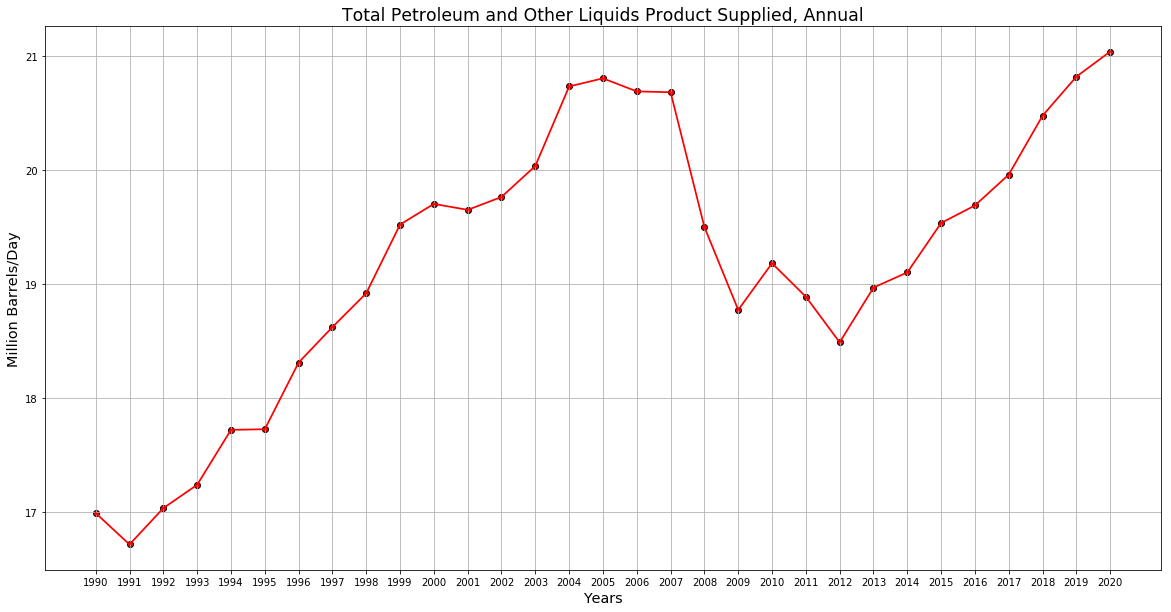

In [145]:
# Total Petroleum and Other Liquids Product Supplied, Annual
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, petroleum, color="red", edgecolors="black")
plt.plot(years, petroleum, linewidth=1.75, color="red")
plt.title("Total Petroleum and Other Liquids Product Supplied, Annual", fontsize="xx-large")
plt.ylabel("Million Barrels/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Petroleum Consumption.png")

# display the figure
plt.show()

In [146]:
# US Natural Gas Consumption, Annual
natural_gas_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCPUS.A"

In [147]:
print(requests.get(natural_gas_url))

<Response [200]>


In [148]:
response = requests.get(natural_gas_url).json()

In [149]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [150]:
# US Natural Gas Consumption, Annual
# Create lists to determine x and y axis for graphs
years = []
natural_gas_consumption = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    natural_gas_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
natural_gas = natural_gas_consumption[::-1]

In [151]:
# Loop through to calculate the annual percent change
i = 0
percent_change_natgas = []
for x in natural_gas:
    if(i == 0):
        percent_change_natgas.append(0)
    else:
        percent_change_natgas.append( (x - natural_gas[i-1])/ natural_gas[i-1] * 100)
    i += 1

In [152]:
# Determine year to year percent change
ng_consumption_bcf_df = pd.DataFrame({
    'Year': years,
    'NG (bcf/day)': natural_gas,
    '% Change': percent_change_natgas
})
ng_consumption_bcf_df.set_index("Year").head()

,NG (bcf/day),% Change
Year,,
1990,52.530288,0.000000
1991,53.594703,2.026289
1992,55.268382,3.122845
1993,56.958472,3.057969
1994,58.211229,2.199421


In [153]:
# calculate average percent change over thirty years
ng_consumption_bcf_df.mean()

Year            6.419997e+121
NG (bcf/day)     6.523577e+01
% Change         1.548432e+00
dtype: float64

In [154]:
#  Export file as a CSV, without the Pandas index, but with the header
ng_consumption_bcf_df.to_csv("resources/NaturalGasConsumption.csv", index=False, header=True)

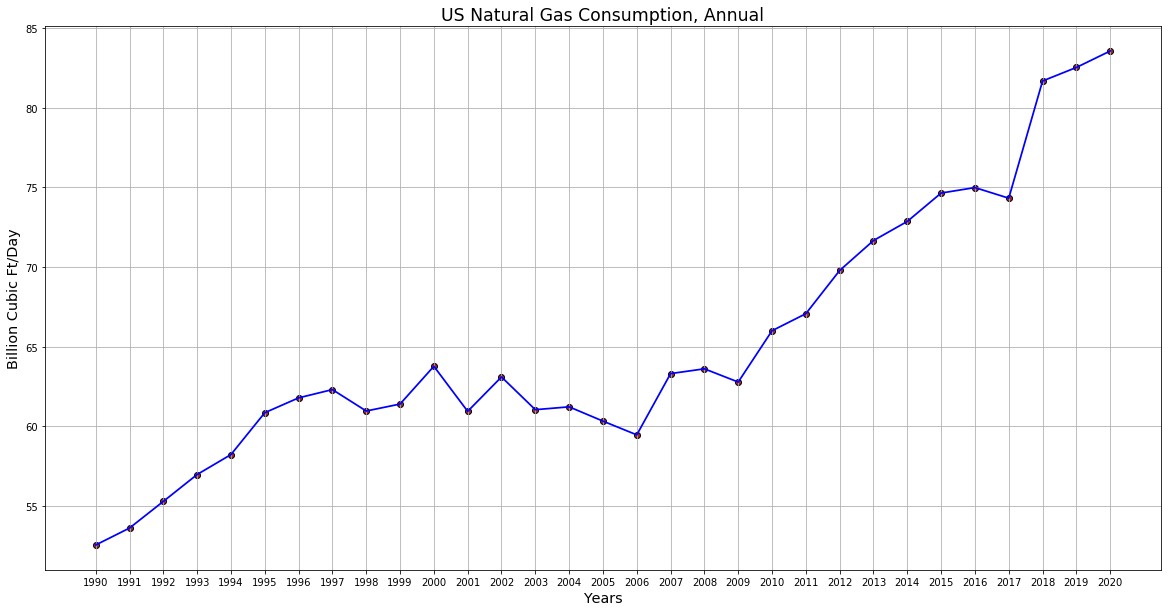

In [155]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, natural_gas, color="brown", edgecolors="black")
plt.plot(years, natural_gas, linewidth=1.75, color="blue")
plt.title("US Natural Gas Consumption, Annual", fontsize="xx-large")
plt.ylabel("Billion Cubic Ft/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Natural Gas Consumption.png")

# display the figure
plt.show()

In [156]:
# US Total Coal Supply, Annual
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"

In [157]:
print(requests.get(coal_url))

<Response [200]>


In [158]:
response = requests.get(coal_url).json()

In [159]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [160]:
# US Total Coal Supply, Annual
# Create lists to determine x and y axis for graphs
years = []
coal_supply = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    coal_supply.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
coal = coal_supply[::-1]

In [161]:
# Loop through to calculate the annual percent change
i = 0
percent_change_coal = []
for x in coal:
    if(i == 0):
        percent_change_coal.append(0)
    else:
        percent_change_coal.append( (x - coal[i-1])/ coal[i-1] * 100)
    i += 1

In [162]:
# Determine year to year percent change
coal_consumption_mst_df = pd.DataFrame({
    'Year': years,
    'coal (MMSt)': coal,
    '% Change': percent_change_coal
})
coal_consumption_mst_df.set_index("Year").head()

,coal (MMSt),% Change
Year,,
1990,902.768744,0.000000
1991,895.303788,-0.826896
1992,908.113844,1.430806
1993,939.165111,3.419314
1994,955.626226,1.752739


In [163]:
# Calculate average percent change
coal_consumption_mst_df.mean()

Year           6.419997e+121
coal (MMSt)     9.557265e+02
% Change       -1.200559e+00
dtype: float64

In [164]:
#  Export file as a CSV, without the Pandas index, but with the header
coal_consumption_mst_df.to_csv("resources/CoalConsumption.csv", index=True, header=True)

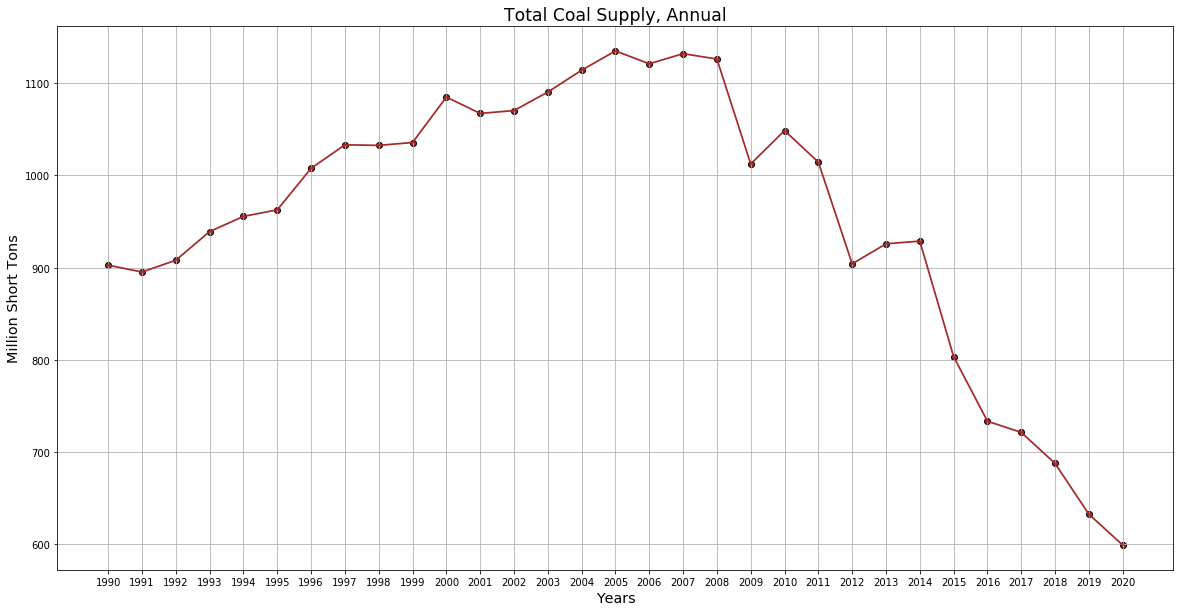

In [165]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, coal, color="brown", edgecolors="black")
plt.plot(years, coal, linewidth=1.75, color="brown")
plt.title("Total Coal Supply, Annual", fontsize="xx-large")
plt.ylabel("Million Short Tons", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Coal Consumption.png")

# display the figure
plt.show()

In [166]:
# Create Combined FossilFuel DataFrame using list of dictionaries method
fossilfuel_consumption_df = pd.DataFrame({
    'Year': years,
    'Petroleum (mmbpd)': petroleum,
    'Natural Gas (bcf/day)': natural_gas,
    'Coal (MMSt)': coal,
})
# Display DataFrame
# fossilfuel_consumption_df.set_index("Year")
fossilfuel_consumption_df

,Year,Petroleum (mmbpd),Natural Gas (bcf/day),Coal (MMSt)
0,1990,16.989137,52.530288,902.768744
1,1991,16.713847,53.594703,895.303788
2,1992,17.032224,55.268382,908.113844
3,1993,17.236999,56.958472,939.165111
4,1994,17.718979,58.211229,955.626226
5,1995,17.724571,60.840793,962.736259
6,1996,18.309109,61.773442,1007.733406
7,1997,18.620302,62.294088,1033.221470
8,1998,18.917022,60.947825,1032.672650
9,1999,19.519432,61.384995,1035.740304


In [167]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_df.to_csv("resources/FossilFuelConsumption.csv", index=False, header=True)

In [168]:
# Normalize values for the different types of fossil fuels
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)
fossilfuel_consumption_normdf = pd.DataFrame(x_scaled, columns=['PetNorm', 'NatGasNorm', 'CoalNorm'])
fossilfuel_consumption_normdf

,PetNorm,NatGasNorm,CoalNorm
0,0.063674,0.000000,0.566485
1,0.000000,0.034298,0.552554
2,0.073640,0.088229,0.576460
3,0.121004,0.142688,0.634407
4,0.232485,0.183056,0.665127
5,0.233779,0.267787,0.678395
6,0.368982,0.297840,0.762368
7,0.440960,0.314617,0.809933
8,0.509591,0.271236,0.808909
9,0.648927,0.285323,0.814634


In [169]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_normdf.to_csv("resources/FossilFuelConsumptionNormValues.csv", index=False, header=True)

In [170]:
# np.array(fossil_fuel_consumption_df['Petroleum (mmbpd)'])

In [171]:
x_lim = 0.25 * np.pi
x_axis = np.arange(0, x_lim, 1.0)
sin = np.sin(x_axis)

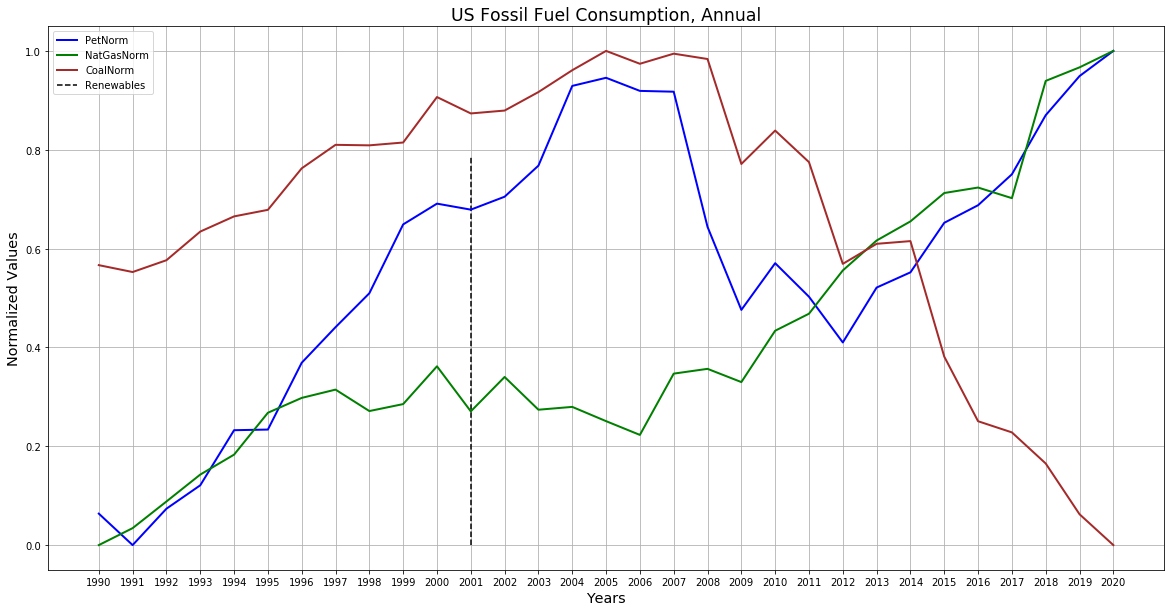

In [173]:
# US Fossil Fuel Consumption (1990 - Present)
plt.figure(figsize=(20,10))

# # Create a visual for the combined normalized fossil fuel data
plt.plot(years, fossilfuel_consumption_normdf['PetNorm'], color= "blue", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['NatGasNorm'], color ="green", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['CoalNorm'], color="brown", linewidth=2.0)
plt.title("US Fossil Fuel Consumption, Annual", fontsize="xx-large")
plt.ylabel("Normalized Values", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
# lgnd.legendHandles[1]._sizes = 30
# lgnd.legendHandles[2]._sizes = 30
# lgnd.legendHandles[3]._sizes = 30
# plt.legend(handles=[world_avg, country_one], loc="best")
plt.grid(True)

# lgnd = plt.legend(fontsize="small", mode="Expanded", 
#                   numpoints=1, scatterpoints=1, 
#                   loc="best", title="City Types", 
#                   labelspacing=0.5)
# lgnd.legendHandles["Petroleum"]._sizes = [30]
# lgnd.legendHandles["Natural Gas"]._sizes = [30]
# lgnd.legendHandles["Coal"]._sizes = [30]

#save figure as a png
plt.savefig("output/US Fossil Fuel Consumption.png")

# # Display line for when renewables began to take off
plt.vlines(11, 0, x_lim, alpha=1.0, linestyles="--", label="Renewables")
plt.legend()

# display the figure
plt.show()
